# Overview of MDL model test database for manoeuvring 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 461 ('figure.figsize   : 5, 3   ## figure size in inches')
Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 462 ('figure.dpi       : 100        ## figure dots per inch')


In [27]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)
import numpy as np
import os
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

from src.data import database
from mdldb import mdl_to_evaluation
from mdldb.tables import Run
import src.data
import os.path

In [18]:
db = database.get_db()

## Overview

In [19]:
test_types = [test_type for test_type in db.session.query(Run.test_type).distinct()]
test_types

[('smeg'),
 ('seakeeping'),
 ('teckenkoll'),
 ('prepare'),
 ('GM'),
 ('reference speed'),
 ('roll decay'),
 ('rodergrundvinkel'),
 ('zigzag'),
 ('turning circle'),
 ('rerun'),
 ('u turn'),
 ('spiral'),
 ('unknown'),
 ('bollard pull'),
 ('captive'),
 ('none standard'),
 ('crash stop'),
 ('wave calibration'),
 ('pitch decay'),
 ('surge decay'),
 ('sway decay'),
 ('softmooring'),
 ('williamson turn'),
 ('heave decay'),
 ('yaw decay')]

In [20]:
sql="""
SELECT * from
run
WHERE run.test_type=="zigzag" OR 
      run.test_type=="turning circle" OR
      run.test_type=="williamson turn" OR
      run.test_type=="captive" OR
      run.test_type=="spiral"     
"""
statistics = pd.read_sql_query(sql=sql, con=db.engine)

In [21]:
statistics.describe()

,id,project_number,series_number,run_number,test_number,loading_condition_id,ship_speed,angle1,angle2
count,2285.000000,2.285000e+03,2285.000000,2285.00000,2285.0,2285.000000,2285.000000,709.000000,709.000000
mean,10002.125602,2.136135e+07,6.255142,24.87965,1.0,76.435449,15.524044,14.640339,14.589563
std,6561.309547,4.128206e+06,9.365002,17.51999,0.0,50.561435,3.620363,5.032842,5.082589
min,67.000000,2.005384e+07,0.000000,1.00000,1.0,1.000000,0.000000,5.000000,1.000000
25%,3705.000000,2.007471e+07,1.000000,12.00000,1.0,23.000000,14.000000,10.000000,10.000000
50%,8949.000000,2.012632e+07,2.000000,22.00000,1.0,81.000000,15.600000,10.000000,10.000000
75%,15550.000000,2.014727e+07,11.000000,34.00000,1.0,117.000000,18.200000,20.000000,20.000000
max,21213.000000,4.010545e+07,98.000000,148.00000,1.0,163.000000,25.000000,20.000000,20.000000


## Load one test

In [22]:
for db_run in db.session.query(Run).filter(Run.test_type=='zigzag'):
    pass

In [23]:
run = mdl_to_evaluation.db_run_to_evaluation_run(run=db_run)

c:\dev\manoeuvring\venv\lib\site-packages\signal_lab\cut_file.py:271: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.units = units_
c:\dev\manoeuvring\venv\lib\site-packages\signal_lab\mdl_to_evaluation.py:103: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_.units = units
c:\dev\manoeuvring\venv\lib\site-packages\signal_lab\cut_file.py:496: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.units = units


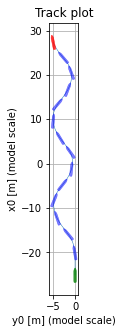

In [24]:
run.track_plot();

In [28]:
interesting_columns = ['time','x0','y0','psi','r']
df = run.df[interesting_columns].copy()
df.set_index('time', inplace=True)
file_path = os.path.join(src.data.path_raw,'example_zigzag.csv')
df.to_csv(file_path, sep=';')

In [12]:
run.df.columns

Index(['Carriage/Psip', 'Carriage/Xp_east', 'Carriage/Xp_west', 'Carriage/Yp',
       'Carriage/dXp', 'MA/Alfa', 'MA/Beta', 'MA/Delta', 'MA/Gamma',
       'MA/Pitch', 'MA/Roll', 'MA/Torkorr', 'delta', 'dpsi', 'psi', 'x_origo',
       'y_origo', 'z_origo', 'roll', 'pitch', 'x0', 'y0', 'z0', 'time',
       'distance', 'x0dot', 'y0dot', 'p', 'q', 'r', 'u', 'v', 'V', 'beta',
       'surge', 'sway', 'yaw', 'heave'],
      dtype='object')

In [16]:
src.data.path

'c:\\dev\\manoeuvring\\data'